In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from urllib.request import urlopen

from augmentations import set_image_size
from augment_and_mix import augment_and_mix

# Images

In [2]:
# Image URLs below are taken from OpenImages dataset explorer available at 
# https://storage.googleapis.com/openimages/web/visualizer/index.html
sample_urls = [
 'https://farm2.staticflickr.com/3741/11142469394_17539551f3_o.jpg',
 'https://farm2.staticflickr.com/3703/9514697661_56a7d855f5_o.jpg',
 'https://farm5.staticflickr.com/3671/13948468354_d0263e972f_o.jpg',
 'https://c5.staticflickr.com/7/6055/6285398625_02e4e3fe8b_o.jpg',
 'https://farm7.staticflickr.com/5563/14990313385_666034c93d_o.jpg']

# Helper images

In [3]:
def open_image(url, size=300):
    data = urlopen(url)
    img = Image.open(data)
    img.thumbnail((size,size))
    return img

In [4]:
def augment_image(pil_image, image_size, alpha=1, depth=-1, severity=3, width=3):
    image = pil_image.copy()
    image = image.resize((image_size, image_size))
    img_array = np.array(image).astype(float)

    img_augmented = augment_and_mix(img_array,width=width,severity=severity,depth=depth,alpha=alpha)
    img_augmented = np.clip(img_augmented,0,255).astype('uint8')
    return img_augmented

# Augmentation value change

In [5]:
# augmentations.py originally sets IMAGE_SIZE variable for the operations
IMAGE_SIZE = 500
set_image_size(IMAGE_SIZE)

# Plot many images

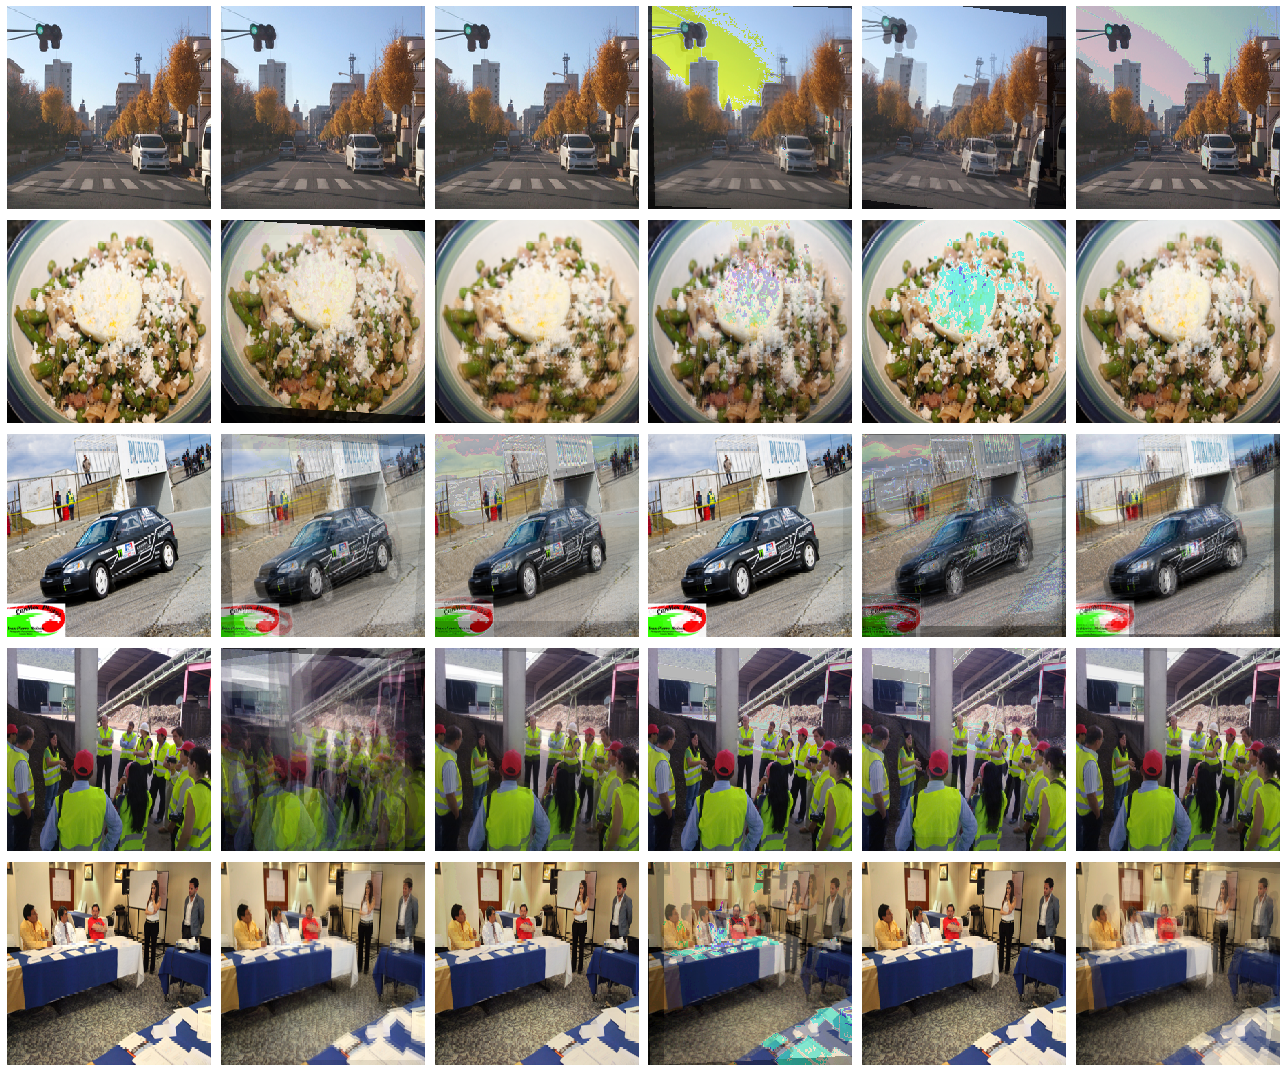

In [11]:
images_count = len(sample_urls)
iterations = 5
fig, axs = plt.subplots(images_count, iterations+1, figsize=(18,15))

for image_id in range(images_count):
    image = open_image(sample_urls[image_id]).resize((IMAGE_SIZE, IMAGE_SIZE))
    axs[image_id][0].imshow(image)
    axs[image_id][0].axis('off')
    for i in range(iterations):
        augmented = augment_image(image, IMAGE_SIZE, alpha=1, severity=3, depth=-1, width=3)
        axs[image_id][i+1].imshow(augmented)
        axs[image_id][i+1].axis('off')
fig.tight_layout()